In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler


## Estimacion Basica (Vainilla)

#### cargar datos

In [18]:
data = pd.read_csv("../data/casas-california.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### visualizar casa de california

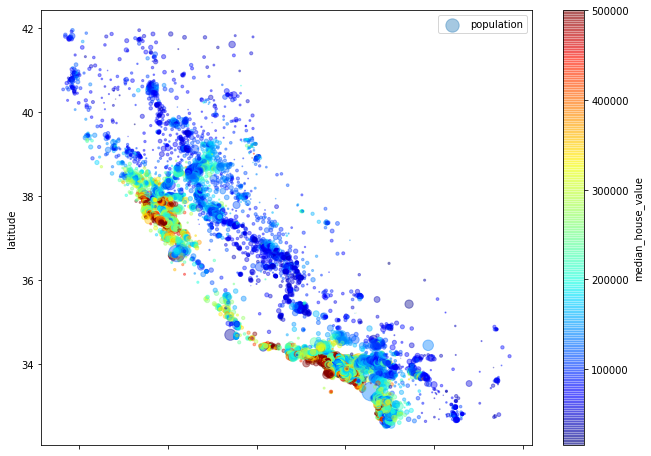

In [19]:
data.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.4,
             s = data["population"] / 100, label ="population", figsize =(11,8),
             c ="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, ) 
plt.legend()

#### correlaciones

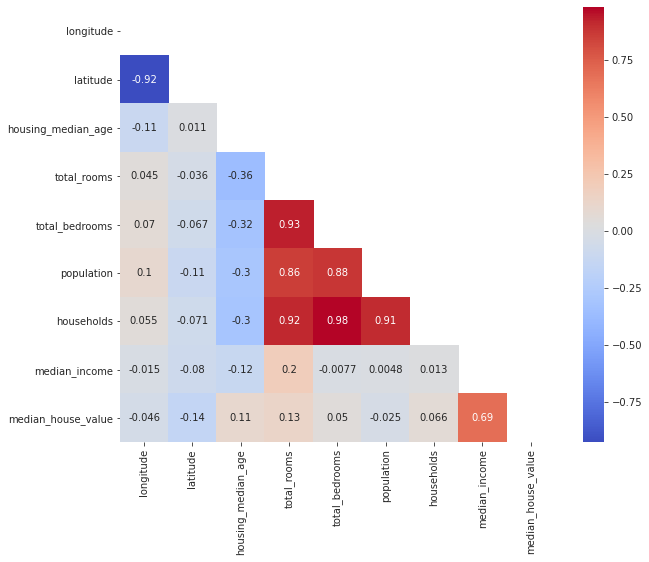

In [20]:
### EJERCICIO: (1pt) 
# utilize matplotlib para desplegar la matriz de correlaciones
correlations = data.corr()


# Nota: decidi hacerlo con seaborn, me parece mas legible y visualmente agradable que matplotlib
# Crear mascara para mayor legibilidad 
custom_mask = np.zeros_like(correlations)
custom_mask[np.triu_indices_from(custom_mask)] = True

with sns.axes_style("ticks"):
    figura, ejes = plt.subplots(figsize=(10, 8))
    ejes = sns.heatmap(correlations, mask=custom_mask, square=True,cmap="coolwarm", annot=True)
    plt.show()


In [21]:
### EJERCICIO: (1pt) 
# despliegue las correlaciones de la variable median_house_value
correlations["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### limpieza de datos

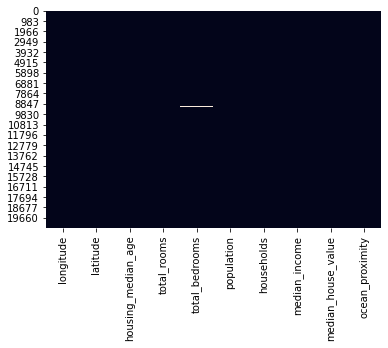

In [22]:
### EJERCICIO: (1pt)
# utilize seaborn para revisar de que no hay valores en blanco. despliegue el grafico de seaborn.
sns.heatmap(data.isnull(), cbar=False)

# actualizando Nan Values en total_bedrooms con la media
data['total_bedrooms'] = data['total_bedrooms'].fillna(
    data['total_bedrooms'].mean())

In [23]:
### EJERCICIO: (1pt)
# Revise los tipos de las columnas y verifique que cada uno esta definido correctamente 
# (ejemplo, la variable OCEAN_PROXIMITY debe ser categorica)

enc = OrdinalEncoder()
enc.fit(data[["ocean_proximity"]])
data[["ocean_proximity"]] = enc.transform(data[["ocean_proximity"]])
data.info()
#Nota
# intente usar astype('category') sin embargo no pude por este error al momento de generar el modelo
#: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


#### test & training set

In [24]:
### EJERCICIO: (1pt) 
# separe el dataset train:80%, test:20%, random_state=42 
# donde y = median_house_value

median_house_value = data.median_house_value
X = data.loc[:, data.columns != 'median_house_value']

X_train, X_test, median_house_train, median_house_test = train_test_split(
    X,
    median_house_value,
    test_size=0.20,
    random_state=42
)

#### regresion lineal multiple

In [25]:
### EJERCICIO: (1pt)
# estime el modelo de regresion lineal utilizando Sklearn.
# imprima los coeficientes

model = LinearRegression().fit(X.values, median_house_value.values)

print("Coefficients")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

Coefficients
b 0 : -3567819.65
b 1 : -42582.39
b 2 : -42453.34
b 3 : 1144.19
b 4 : -6.69
b 5 : 82.44
b 6 : -39.81
b 7 : 78.14
b 8 : 39777.63
b 9 : 69.67


In [26]:
### EJERCICIO: (1pt)
# utilize statsmodels para estimar las estadisticas del modelo actual.
# estime el MSE del train/test

X2 = sm.add_constant(X)
model_ols = sm.OLS(median_house_value, X2)
pred = model_ols.fit()



y_prima_train = model.predict(X_train)
mse_train = mean_squared_error(median_house_train, y_prima_train)

y_prima_test = model.predict(X_test)
mse_test = mean_squared_error(median_house_test, y_prima_test)

print("\n"*2)
print("MSE Train:",np.sqrt(mse_train))
print("MSE Test:",np.sqrt(mse_test))

print(pred.summary())




MSE Train: 69405.72070584423
MSE Test: 70636.46210089
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:11:20   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

## Estimacion Avanzada - Feature Engineering

En este momento, ud acaba de realizar la estimación del modelo más básico, sin aplicar transformaciones, ni escalamientos a las variables. 

**Aqui es donde se pone bonito...**

En esta sección debe estudiar las variables, sus distribuciones, para identificar qué tipo de cosas se pueden realizar para mejorar el modelo. Vuelva a calcular las estadísticas del modelo (antes y después) para que tenga un punto de referencia.

Algunas recomendaciones:
- Trate de comprender el rol de la variable en la prediccion. Tiene sentido?
- Algunos modelos trabajan mejor con menos variables. (aqui puede agregar o remover variables)
- Aplique transformaciones para "normalizar" variables (que tengan una distribucion quasi-normal)
- considere crear nuevas variables de ser necesario: por ejemplo bedrooms_per_room = data["total_bedrooms"] / data["total_rooms"]

In [27]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

In [28]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 
new_data = data.loc[::, ['median_income', 'longitude',
                         'latitude', 'median_house_value']]

#'ocean_proximity'
households_per_population = data["households"] / data["population"]
new_data["households_per_population"] = households_per_population

bedrooms_per_total_rooms = data["total_bedrooms"] / data["total_rooms"]
new_data["bedrooms_per_total_rooms"] = bedrooms_per_total_rooms

y = new_data.median_house_value
X = new_data.loc[:, new_data.columns != 'median_house_value']

new_data.head()

,median_income,longitude,latitude,median_house_value,households_per_population,bedrooms_per_total_rooms
0,8.3252,-122.23,37.88,452600.0,0.391304,0.146591
1,8.3014,-122.22,37.86,358500.0,0.473969,0.155797
2,7.2574,-122.24,37.85,352100.0,0.356855,0.129516
3,5.6431,-122.25,37.85,341300.0,0.392473,0.184458
4,3.8462,-122.25,37.85,342200.0,0.458407,0.172096


In [13]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones
X

,median_income,longitude,latitude,households_per_population,bedrooms_per_total_rooms
0,8.3252,-122.23,37.88,0.391304,0.146591
1,8.3014,-122.22,37.86,0.473969,0.155797
2,7.2574,-122.24,37.85,0.356855,0.129516
3,5.6431,-122.25,37.85,0.392473,0.184458
4,3.8462,-122.25,37.85,0.458407,0.172096
...,...,...,...,...,...
20635,1.5603,-121.09,39.48,0.390533,0.224625
20636,2.5568,-121.21,39.49,0.320225,0.215208
20637,1.7000,-121.22,39.43,0.429990,0.215173
20638,1.8672,-121.32,39.43,0.470985,0.219892


In [29]:
### EJERCICIO: (1pt)

X_train, X_test, median_house_train, median_house_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)


# Estime nuevamente el modelo de regresion lineal
model = LinearRegression().fit(X_train, median_house_train)

print("Coefficients")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

Coefficients
b 0 : -3779890.15
b 1 : 41704.83
b 2 : -43684.19
b 3 : -43682.80
b 4 : 304679.57
b 5 : 222353.10


In [31]:
### EJERCICIO: (1pt)
# Calcule nuevamente las estadisticas para determinar si hay mejoras sobre el modelo.
# estime el MSE del train/test

X_train, X_test, median_house_train, median_house_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

model_ols = sm.OLS(median_house_train, X_train)
model_prediction = model_ols.fit()

y_prima_train = model.predict(X_train)
mse_train = mean_squared_error(median_house_train, y_prima_train)

y_prima_test = model.predict(X_test)
mse_test = mean_squared_error(median_house_test, y_prima_test)

print("\n"*2)
print("MSE Train:",np.sqrt(mse_train))
print("MSE Test:",np.sqrt(mse_test))
print(model_prediction.summary())




MSE Train: 67302.46429821097
MSE Test: 71286.45224559667
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     6441.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:13:12   Log-Likelihood:            -2.0699e+05
No. Observations:               16512   AIC:                         4.140e+05
Df Residuals:                   16506   BIC:                         4.140e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------